# Machine Learning Intro

## TEIL A: Klassifikation von Iris Blumen


In dieser Aufgabe sehen wir uns das Iris Dataset an. Hierbei geht es darum die Blumen anhand ihrer Blütenblätter- (Petal) und Kelchblättermasse (Sepal) zu klassifizieren.

Wir importieren zuerst einmal einige Libraries die wir nutzen möchten.

<div style="padding: 5px; border: 5px solid #a10000ff;">

**Hinweis:** In den Codezellen sind jeweils einige Codeteile nicht programmiert. Diesen Code müssen Sie ergänzen. Die jeweiligen Stellen sind mit einem Kommentar und dem Keyword **TODO** vermerkt und z.T. Stellen mit ... markiert.

Ausserdem gibt es einige assert Statements. Diese geben einen Fehler aus, sollte etwas bei Ihrer Programmierung nicht korrekt sein.

**Installation:** Führen Sie folgende Zeile aus um die hier benötigten Libraries zu installieren.

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

Nun laden wir das Iris Dataset, welches bereits in der Library angeboten wird. Wir speichern es auch in einem DataFrame

In [ ]:
#load iris dataset
iris = datasets.load_iris()

#create pandas dataframe from iris
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].apply(lambda x: iris.target_names[x])

Eine Aufgabe, die von Machine Learning übernommen wird, ist die Klassifizierung. 

Dabei ist es die Aufgabe ein **Data Sample** (z.B. eine Katze oder einen Hund) aufgrund von bestimmten **Features** (z.B. Anzahl Streifen, Grösse) einer bestimmten Kategorie auch **Klasse** genannt zuzuweisen. Die einzelnen Data Samples sind jeweils mit einem **Label** gekennzeichnet, zu welcher Klasse sie gehören.

In dem Dataset das wir betrachten, geht es um Iris Blumen.
Ronald Fisher präsentiert 1936 diesen Datensatz, um damit seine neuen statistischen Methoden zu erklären, die damit helfen verschiedene (Pflanzen-) Gattungen auseinanderzuhalten.
Der Datensatz umfasst 50 Proben 3 verschiedener Blumengattungen (Iris setosa, Iris virginica und Iris versicolor). 

Jedes Data Sample hat 4 Merkmale (Features): die Länge und Breite der Blütenblätter (Petal) und der Kelchblätter (Sepal). Das Ziel ist es, die Blumen anhand dieser Merkmale zu klassifizieren.

### Aufgabe 1
Führen Sie die Zelle unten aus und zeigen Sie das Dataset an. Es beinhaltet die Features und die Zielvariable (target).

**Fragen**

Was sind die Features die wir in diesem Beispiel nutzen?


Was beinhaltet die Spalte target bzw. target_names?


In [ ]:
df_iris

### Optional: Aufgabe 2
Wir zeigen nun die paarweise Kombination von den Features an. Führen Sie dazu die nächste Code-Zelle aus.

**Frage**

Wenn Sie die Blumen von Auge anhand eines der Diagramme unterscheiden müssten.
Welche Feature Kombination würde sich gut eignen? Begründen Sie.


In [ ]:
#Wir plotten den Featurespace von jeweils zwei Features als Dimensionen
pairplt = sns.pairplot(df_iris.drop('target', axis=1), hue='target_names', height=2, palette='tab10')


### Aufgabe 3
In diesem Fall möchten wir nun die Blumen in die Klassen setosa (0), versicolor (1) und verginica (2) einteilen. Die Daten haben alle bereits die sogenannten **Labels** zugewiesen. Diese werden manchmal auch target genannt und sind in den Daten in den Spalten target und target_names vorhanden.

Wenn wir ein oder mehrere Features in einem mathematischen Raum kombinieren, entsteht ein sogennanter **Feature Space** (Merkmalsraum).
Ein solcher Feature Space für die *petal width* und *petal length* sieht wie folgt aus. 

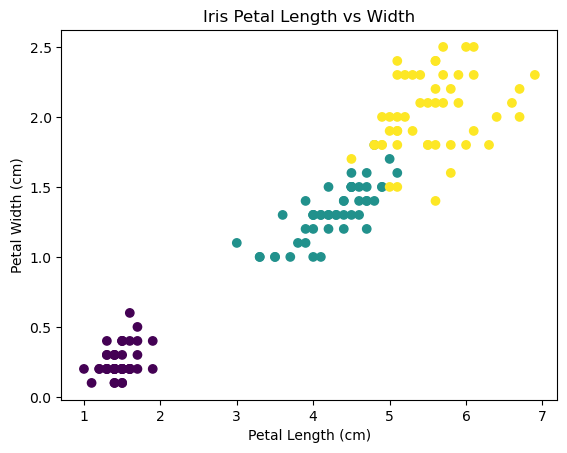

In [8]:
fig, ax = plt.subplots()
ax.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'] , c=df_iris['target'], cmap='viridis')
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_title('Iris Petal Length vs Width') 
plt.show()



**Fragen**

Wie viele Dimensionen hat der Feature Space im obigen Beispiel?


Wie viele Dimensionen können wir in einem Feature Space haben?


### Aufgabe 4

Ein Klassifikationsmodell versucht eine oder mehrere **Decision Boundaries** also Entscheidungsgrenzen in den Feature Space zu platzieren, so dass möglichst viele Data Samples korrekt klassifiziert werden.
Die Entscheidungsgrenze unterteilt den Feature Space (Merkmalsraum) in zwei Teilräume. Auf der einen Seite der Grenze sind dann Data Samples der einen Klasse und auf der anderen Seite die der anderen Klasse.

**Frage**

Beschreiben Sie, wie Sie zwei linearen Decision Boundaries (gerade Linien) im Feature Space oben platzieren würden um die drei Klassen möglichst gut auseinanderzuhalten.



### Aufgabe 5

Machine Learning Modelle treffen Entscheidungen anhand von Daten, welche Sie zu Beginn der «Kalibrierung» genutzt haben, um zu lernen. Man nennt diese Daten **Trainingsdaten**, da das Modell sozusagen damit trainiert wird. Wenn nun ein Machine Learning Modell getestet wird (heisst: wie gut funktioniert das Modell?), werden ihm neue Daten sogenannte **Testdaten** präsentiert, welche nicht für das Training genutzt wurden. 

**Fragen**

Was ist der Vorteil der Nutzung von Testdaten? 


Was könnte ein Nachteil oder eine Herausforderung sein?



### Aufgabe 6 

Damit wir Trainings- und Testdaten haben, teilen wir die Daten in Trainings und Testdaten ein. Das gleiche passiert auch mit den targets. Wir nutzen eine fertige Funktion von sklearn dafür.
Der Parameter test_size gibt an, welcher Bruchteil der gesamten Daten als Testdaten genutzt werden soll.

Vielfach werden die Features in einer Variable X gespeichert und die Labels bzw. Targets in einer Variable y.

Wir machen das gleich und kennzeichnen gleich im Variablennamen auch ob die Daten die Trainings oder Testdaten sind.

**Fragen**


Wie viele Data Samples sind nun im Trainings Dataset und wie viele im Testdataset?


In [9]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_iris_train.shape}, Testdaten: {X_iris_test.shape}")


Trainingsdaten: (120, 4), Testdaten: (30, 4)


### Aufgabe 7

Wir trainieren unseren ersten Classifier und testen diesen auch. 

Hier nutzen wir einen fixfertigen Classifier von Sklearn den wir instanziieren müssen und dann "fitten". Hinter der fit Funktion versteckt sich ein Trainingsprozess in dem das Modell von den Trainingsdaten lernt.
Vervollständigen Sie die Befehle anhand der Kommentare.

**Bemerkung:** Das Modell wurde extra so konfiguriert, dass nicht eine 100% Genauigkeit resultiert, damit wir die Genauigkeit auswerten können. Deshalb erscheint auch eine **ConvergenceWarning**, diese können Sie **ignorieren**. Die Warnung bedeutet, dass das Modell noch nicht die optimalen Parameter gelernt hat und noch weiter lernen sollte.

Wir evaluieren das Modell mittels der Accuracy. Diese wird berechnet indem die Anzahl korrekt klassifizierten Data Samples geteilt durch die Anzahl aller Data Samples gerechnet wird:

  $ Accuracy = \frac{\text{Anzahl korrekt Klassifizierte Data Samples}}{\text{Alle Data Samples}} $


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

#TODO Trainieren Sie das Modell mit den Trainingsdaten als erstes Argument und den zugehörigen Labels als zweites Argument
mlp.fit(..., ...)

#TODO Berechnen Sie mit dem Modell die Klassen für die Testdaten als einzigen Parameter in der predict-Methode
y_iris_pred = mlp.predict(...)

# TODO Berechnen Sie die Genauigkeit des Modells
# Dies können wir berechnen indem wir zählen, wie viele der vorhergesagten Labels mit den tatsächlichen Labels übereinstimmen und dies durch die Gesamtanzahl der Testdaten teilen
accuracy = ...

# Test ob die Accuracy korrekt berechnet wurde
assert (abs(accuracy-0.93) < 0.01), "Die Genauigkeit des Modells ist nicht korrekt berechnet."
print(f'Accuracy: {accuracy*100:.2f}%')

### Optional: Aufgabe 8

Wir schauen uns nun noch genauer an, welche Klassen am meisten verwechselt wurden. Dazu werden wir eine Konfusionsmatrix nutzen. Dabei werden die tatsächlichen Labels den vorhergesagten Labels gegenübergestellt und aufgezeichnet, wie oft jede Kombination vorkommt.


**Frage**
Betrachten Sie nun nochmals die paarweisen Feature Spaces aus Aufgabe 2 betrachten.
Welche zwei Klassen werden wohl am meisten verwechselt?


Lassen Sie nun die Zelle unten laufen und interpretieren Sie die Konfusionsmatrix. Stimmte ihre Vermutung?



In [ ]:
# Wir zeigen nun eine Konfusionsmatrix an, um die Leistung des Modells zu visualisieren. 

conf_matrix = ConfusionMatrixDisplay.from_predictions(y_iris_test, y_iris_pred, display_labels=iris.target_names)
conf_matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Kontrollfragen Klassifikation

**Kontrollfrage 1**

Ein Machine-Learning Modell klassifiziert die Schüler*innen ob sie mit dem Velo, den ÖV oder zu Fuss zur Schule kommen. 
In den Daten wird pro Schüler*in und Tag erfasst, wie weit der Schulweg ist, wie lange die Reisedauer war, ob der/die Schüler*in ein Velo besitzt und wie weit die nächste ÖV-Haltestelle vom Wohnort entfernt ist.

Was sind in diesem Beispiel

    - Features?
    - Klassen?
    - Data Samples?
    
Was wäre ein Beispiel für eine Ein und Ausgabe des Modells?






**Kontrollfrage 2**

Beschreiben Sie das Vorgehen, um ein Klassifikationsmodell zu evaluieren und dabei die Accuracy zu berechnen.



## TEIL B: Optional Regression mit Hauspreisberechnung

In diesem Dataset wurden verschiedene Merkmale (Features) von Liegenschaften erfasst, wobei die Angaben meist pro Block erfasst sind.

Dabei soll nun von den Merkmalen auf den Hauspreis geschlossen werden. Der Hauspreis ist somit die **Zielvariable** oder engl. *Target*, ähnlich dem Label in der Klassifikation.

Die Berechnungen des Hauspreises, werden wir mit einem Regressionsmodell machen.

Das Dataset das wir benutzten, ist das California Housing Dataset:
https://media.geeksforgeeks.org/wp-content/uploads/20240522145850/housing%5B1%5D.csv


**Das Dataset hat folgende Features:**
1. longitude: Koordinaten wie westlich das Haus liegt, höhrere Werte sind weiter westlich.
2. latitude: Koordinaten wie nördlich das Haus liegt, höhrere Werte sind weiter nördlich.
3. housingMedianAge: Median Alter des Hauses in einem Block, tiefere Werte heisst neueres Haus.
4. totalRooms: Anzahl Räume innerhalb eines Blocks.
5. totalBedrooms: Anzahl Schlafzimmer innerhalb eines Blocks.
6. population: Anzahl Personen pro Block.
7. households: Gesamtzahl der Haushalte, d. h. der Gruppen von Personen, die innerhalb einer Wohneinheit wohnen, für einen Block
8. medianIncome: Medianeinkommen der Haushalte innerhalb eines Häuserblocks (gemessen in Zehntausend US-Dollar)
9. medianHouseValue: Medianwert der Häuser für Haushalte innerhalb eines Blocks (gemessen in US-Dollar)
10. oceanProximity: Lage des Hauses in Bezug auf den Ozean

In [ ]:
# Wir laden das Housing Dataset in ein Pandas DataFrame
df_housing = pd.read_csv("datasets/housing.csv")

In [ ]:
df_housing

### Aufgabe 9

Sie haben sich sicherlich die Features im Dataframe angeschaut. Machine Learning Modelle benötigen die Daten als Zahlen um diese im Features Space abbilden zu können. Jedoch haben wir mit ocean_proximity ein Feature das Kategorische Daten enthält. Diese können wir mit dem sogenannten One-Hot-Encoding in einen mathematischen Raum übertragen. Dies geschieht indem wir für jede Kategorie eine neue Dimension anlegen und dort eine 1 vermerken wenn die Kategorie zutrifft und bei allen anderen eine 0. Wir nutzen dazu den One-Hot-Encoder von Scikit-learn.

Zusätzlich entfernen wir noch alle Data Samples die leere Werte haben.

In [ ]:
# Wir verwenden OneHotEncoder aus sklearn.preprocessing
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# TODO Konfigurieren Sie das One-Hot-Encoding auf der Spalte 'ocean_proximity' indem Sie das DataFrame mit der Spaltenangabe als Parameter einfügst. Beispiel: ohe.fit(df_iris[['petal length (cm)']])
ohe.fit(...)

# Wir erstellen ein neues DataFrame mit den kodierten Spalten und füge sie dem ursprünglichen DataFrame hinzu. Danach entfernen wir die ursprüngliche Spalte 'ocean_proximity'.
df_housing_encoded = pd.concat([df_housing, pd.DataFrame(ohe.transform(df_housing[['ocean_proximity']]), columns=ohe.get_feature_names_out(['ocean_proximity']))], axis=1)
df_housing_encoded.drop('ocean_proximity', axis=1, inplace=True)

# Wir entfernen Zeilen mit fehlenden Werten, da diese nicht für das Training des Modells verwendet werden können
df_housing_encoded.dropna(inplace=True)

df_housing_encoded

### Optional: Aufgabe 10

Wir möchten nun noch die Daten normalisieren. Dies bedeutet, dass alle Features danach den gleichen Wertebereich haben. 
Dies hilft einigen Modellen zum Beispiel künstlichen Neuronalen Netzwerken schneller zu optimieren und zu lernen.

Wir wenden die min-max-Skalierung an um die Daten zu normalisieren.
Das heisst alle Features haben danach einen minimalen Wert von 0 und einen maximalen Wert von 1.

Wie könnten Sie dies berrechnen? Vervollständige danach den Code unten.

<details>
<summary><b>Tipp 1:</b> Klicke hier für den ersten Tipp.</summary>

Wie nutzen Sie das Minimum eines Features und das Maximum damit nachher alle Werte eines Features zwischen (inklusive) 0 und 1 sind?

</details>

<br>


<details>
<summary><b>Lösung:</b> Klicken Sie hier um die Formel anzuzeigen.</summary>

$scaled\_value = \frac{value-min}{max - min}$

</details>

In [ ]:
# Normalisieren der numerischen Features mit Min-Max-Skalierung

# Wir haben eine Liste von numerischen Features
numerical_features = df_housing_encoded.select_dtypes(include=['float64', 'int64']).columns

# TODO Normalisieren Sie die numerischen Features mit Min-Max-Skalierung
for feature in numerical_features:
    ...

df_housing_encoded

# Prüfen ob die numerischen Features korrekt normalisiert wurden
assert (df_housing_encoded[numerical_features].min().min() >= 0) and (df_housing_encoded[numerical_features].max().max() <= 1), "Die numerischen Features wurden nicht korrekt normalisiert."

### Aufgabe 11

Unterteilen Sie das Dataset in ein Trainings und Testteil wie im vorherigen Abschnitt Teil A bereits gemacht.
Nutzen Sie auch einen Train/Test Split von 80/20 und den Random State 42

In [ ]:
# TODO Unterteilen sie das Dataset in Trainigns- und Testdaten. Die Spalte 'median_house_value' ist die Zielvariable, die wir vorhersagen möchten. Deshalb wird sie von den Features getrennt. Entferne die Zielvariable aus den Features bei der Parameterübergabe mit df_housing_encoded.drop('median_house_value', axis=1) und benutze sie als zweiten Parameter in der train_test_split Funktion.

X_housing_train, X_housing_test, y_housing_train, y_housing_test = ...


In [ ]:
#TODO Lassen Sie diese Tests laufen, um zu prüfen ob die Aufteilung korrekt ist
assert X_housing_train.shape[0] == 16346, f"Erwartete Anzahl Trainingsdaten: 16346, aktuell sind es: {X_housing_train.shape[0]}"
assert X_housing_test.shape[0] == 4087 , f"Erwartete Anzahl Testdaten: 4087, aktuell sind es: {X_housing_test.shape[0]}"

# Prüfen Sie ob median_house_value aus den Features entfernt wurde
assert 'median_house_value' not in X_housing_train.columns, "median_house_value wurde nicht aus den Features entfernt."

### Aufgabe 12

1. Nutzen Sie die MLPRegressor Klasse um ein Modell zu instantieren. Die Klasse wurde bereits am Anfang importiert. Sie können die gleichen Parameter verwenden wie in Aufgabe 7 beim MLPClassifier.
2. Trainieren Sie nun das Modell mit dem Aufruf der fit(Trainingsdaten, Targets) Methode.

Optional: Weitere Infos zur MLPRegressor Klasse: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [ ]:
# TODO Erstellen des MLPRegressor Modells mit den gleichen Parametern wie Aufgabe 7.
mlp_regressor = MLPRegressor(...)

# TODO Trainieren Sie das Modell mit den Trainignsdaten als erstes Argument und den zugehörigen Labels als zweites Argument
mlp_regressor.fit(..., ...)

### Aufgabe 13

Evaluieren Sie nun ihr Modell mit den Testdaten. Dieses Mal können wir aber nicht die Accuracy nutzen, da diese nur für Klassifikationen geeignet ist.
Wir nutzen stattdessen den **Mean-Squared-Error (MSE)**. Dieser wird wie folgt berechnet:

- $y$: Echtes Label
- $\hat{y}$: Voraussage des Modells

$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

In Prosa geschieht hier folgendes:
Für jedes Data Samples im Testdatenset wird das echte Label minus der Voraussage gerechnet. Dieses Ergebnis wird quadriert. Danach wird die Summe über alle diese quadrierten "Fehler" berechnet und geteilt durch die Anzahl Samples gerechnet. Dies ist somit der Mittelwert des quadrierten Fehlers.

Vervollständigen Sie den Code um den MSE zu berechnen.

In [ ]:
#TODO Berechne nun mit dem Modell die Vorhersagen für die Testdaten als einzigen Parameter in der predict-Methode
y_housing_pred = mlp_regressor.predict(...)

# Berechne den Mean Squared Error (MSE) auf dem Testset (Tipp: verwende np.sum und len)
mse_test = ...
print(f'Mean Squared Error on Test Set: {mse_test:.4f}')

assert abs(mse_test - 0.0197) < 0.01, "Der Mean Squared Error auf dem Testset ist nicht korrekt berechnet."

### Optional: Aufgabe 14 (Zuerst Aufgabe 10 lösen)
Führen Sie die Code-Zelle unten aus. Dabei wird für ein Datasample aus dem Test Dataset der Hauspreis berechnet.

Was fällt Ihnen bei dieser Vorhersage auf?



Weshalb ist die Vorhersage in dieser Grössenordnung und wie könnten Sie dieses Problem lösen?

<br>
<details>
<summary><b>Tipp 1:</b> Klicke hier für den einen Tipp.</summary>

Wir haben auch den House Value mit Min Max Normalisierung skaliert. Wie könnte man dies nun zu einem korrekten Hauswert zurückrechnen?

</details>



In [ ]:
# Beispiel Vorhersage des Preises für ein einzelnes Haus aus dem Testset

y_housing_pred_single = mlp_regressor.predict(X_housing_test[:1])
print(f'Der berechnete Hauswert beträgt: {y_housing_pred_single[0]:.2f}')

# TODO: Optionale Zusatzaufgabe: Skalieren Sie die Vorhersage zurück in den Originalmassstab. Sie können auf die Originalen min und max Werte der Spalte 'median_house_value' im ursprünglichen DataFrame df_housing zugreifen.
y_pred_scaled = ...
print(f'Der berechnete Hauswert im Originalmaßstab beträgt: {y_pred_scaled[0]:.2f}')


### Aufgabe 15

Wir zeigen nun in einem Scatter Plot noch einige zufällige Datenpunkte an, wobei wir vergleichen möchten was der echte Hauspreis ist und was unser Modell berechnet hat.
Lassen Sie die nächste Code Zelle laufen und beantworten Sie die folgende Frage.

**Frage**
Woran erkennt man einen kleinen Fehler des Modells und wie einen grossen?


In [ ]:
# Plotte die Vorhersagen des Modells gegen die tatsächlichen Werte nutze aber nur 50 zufällige Datenpunkte und zeichne den Fehler als Linie ein

random_indices = np.random.choice(len(y_housing_test), size=50, replace=False)
y_housing_pred_sampled = y_housing_pred[random_indices]
y_housing_test_sampled = y_housing_test.iloc[random_indices]


plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_housing_pred_sampled)), y_housing_pred_sampled, color='red', label='Berechnete Werte')
plt.scatter(range(len(y_housing_test_sampled)), y_housing_test_sampled, color='blue', label='Tatsächliche Werte')
for i in range(len(y_housing_pred_sampled)):
    plt.plot([i, i], [y_housing_pred_sampled[i], y_housing_test_sampled.iloc[i]], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Testdaten Index')
plt.ylabel('Median Hauswert (normalisiert)')
plt.title('Vorhersagen vs Tatsächliche Werte des Hauswerts')
plt.legend()
plt.show()

### Zusatzaufgabe: Teste das Training ohne min-max Normalisierung

Führe nochmals einen Traingslauf durch ohne, dass die min-max Skalierung genutzt wurde.
Beobachte wie lange das Training nun läuft. 

**Frage**: Was ist schneller? Min-Max normalisierte Daten oder die ursprünglichen Daten?


## Kontrollfragen: Regression



**Kontrollfrage 3**

Was ist der Output einer Regression und wie verhält sich dieser im Vergleich zu der Klassifikation?



**Kontrollfrage 4**

Welchen Vorteil hat die Normalisierung der numerischen Features gebracht? Wie lautete die Formel?
